# **Vanilla Auto-Encoder**

In [0]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
 
import numpy as np
import matplotlib.pyplot as plt
 
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [0]:
INPUT_SIZE = 784
ENCODING_SIZE = 64
 
input_img = Input(shape=(INPUT_SIZE,))
encoded = Dense(ENCODING_SIZE, activation='relu')(input_img)
decoded = Dense(INPUT_SIZE, activation='relu')(encoded)
autoencoder = Model(input_img, decoded)

In [0]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 1s 20us/step - loss: 0.0362 - val_loss: 0.0177
Epoch 2/50
48000/48000 [==============================] - 1s 18us/step - loss: 0.0148 - val_loss: 0.0127
Epoch 3/50
48000/48000 [==============================] - 1s 17us/step - loss: 0.0119 - val_loss: 0.0112
Epoch 4/50
48000/48000 [==============================] - 1s 18us/step - loss: 0.0106 - val_loss: 0.0102
Epoch 5/50
48000/48000 [==============================] - 1s 18us/step - loss: 0.0099 - val_loss: 0.0097
Epoch 6/50
48000/48000 [==============================] - 1s 17us/step - loss: 0.0096 - val_loss: 0.0094
Epoch 7/50
48000/48000 [==============================] - 1s 16us/step - loss: 0.0094 - val_loss: 0.0093
Epoch 8/50
48000/48000 [==============================] - 1s 17us/step - loss: 0.0092 - val_loss: 0.0090
Epoch 9/50
48000/48000 [==============================] - 1s 18us/step - loss: 0.0090 - val_loss: 0.0089
Epoch

In [0]:
decoded_imgs = autoencoder.predict(X_test)

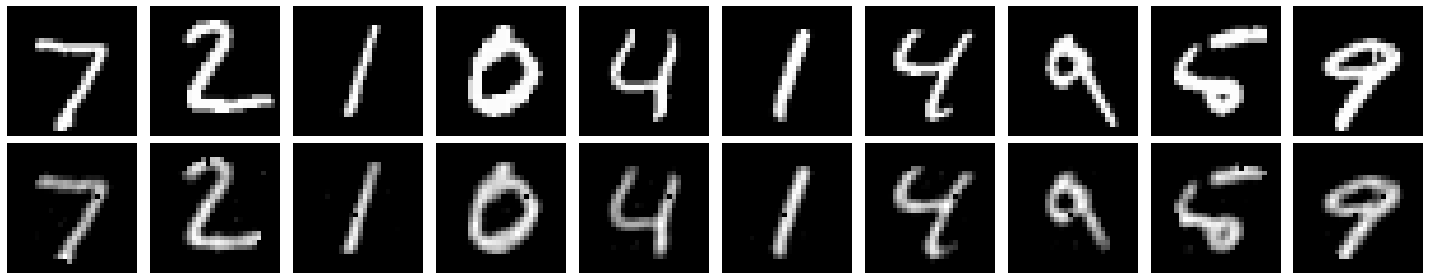

In [0]:
plt.figure(figsize=(20, 4))
for i in range(10):
    # original
    plt.subplot(2, 10, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    plt.axis('off')
 
    # reconstruction
    plt.subplot(2, 10, i + 1 + 10)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    plt.axis('off')
 
plt.tight_layout()
plt.show()

# **Deep Auto-Encoder**

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 2s 37us/step - loss: 0.0391 - val_loss: 0.0218
Epoch 2/50
48000/48000 [==============================] - 1s 26us/step - loss: 0.0186 - val_loss: 0.0163
Epoch 3/50
48000/48000 [==============================] - 1s 24us/step - loss: 0.0151 - val_loss: 0.0140
Epoch 4/50
48000/48000 [==============================] - 1s 25us/step - loss: 0.0135 - val_loss: 0.0134
Epoch 5/50
48000/48000 [==============================] - 1s 22us/step - loss: 0.0125 - val_loss: 0.0123
Epoch 6/50
48000/48000 [==============================] - 1s 26us/step - loss: 0.0118 - val_loss: 0.0117
Epoch 7/50
48000/48000 [==============================] - 1s 25us/step - loss: 0.0110 - val_loss: 0.0110
Epoch 8/50
48000/48000 [==============================] - 1s 24us/step - loss: 0.0106 - val_loss: 0.0105
Epoch 9/50
48000/48000 [==============================] - 1s 23us/step - loss: 0.0102 - val_loss: 0.0102
Epoch

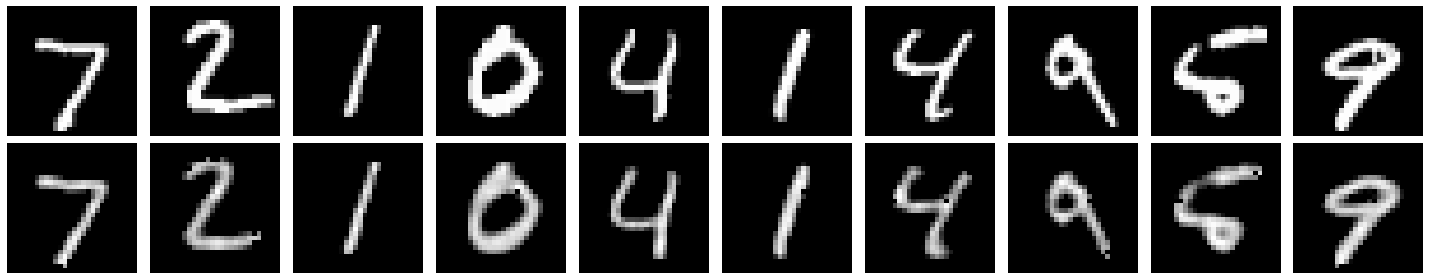

In [0]:
# DEFINITION
input_img = Input(shape=(INPUT_SIZE,))
encoded = Dense(512, activation='relu')(input_img)
encoded = Dense(256, activation='relu')(encoded)
encoded = Dense(128, activation='relu')(encoded)
 
encoded = Dense(ENCODING_SIZE, activation='relu')(encoded)
 
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(512, activation='relu')(decoded)
decoded = Dense(INPUT_SIZE, activation='relu')(decoded)
autoencoder = Model(input_img, decoded)

# COMPILATION
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_split=0.2)

# TESTING
decoded_imgs = autoencoder.predict(X_test)

# VISUALIZATION
plt.figure(figsize=(20, 4))
for i in range(10):
    # original
    plt.subplot(2, 10, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    plt.axis('off')
 
    # reconstruction
    plt.subplot(2, 10, i + 1 + 10)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    plt.axis('off')
 
plt.tight_layout()
plt.show()

# **Convolutional Auto-Encoder**

In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Sequential
from keras.datasets import mnist
 
import numpy as np
import matplotlib.pyplot as plt
 
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [0]:
autoencoder = Sequential()
autoencoder.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 
# our encoding
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
 
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(32, (3, 3), activation='relu'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

In [0]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 8s 174us/step - loss: 0.0489 - val_loss: 0.0339
Epoch 2/50
48000/48000 [==============================] - 2s 42us/step - loss: 0.0287 - val_loss: 0.0255
Epoch 3/50
48000/48000 [==============================] - 2s 42us/step - loss: 0.0236 - val_loss: 0.0222
Epoch 4/50
48000/48000 [==============================] - 2s 41us/step - loss: 0.0211 - val_loss: 0.0205
Epoch 5/50
48000/48000 [==============================] - 2s 41us/step - loss: 0.0195 - val_loss: 0.0192
Epoch 6/50
48000/48000 [==============================] - 2s 41us/step - loss: 0.0183 - val_loss: 0.0179
Epoch 7/50
48000/48000 [==============================] - 2s 41us/step - loss: 0.0175 - val_loss: 0.0173
Epoch 8/50
48000/48000 [==============================] - 2s 41us/step - loss: 0.0169 - val_loss: 0.0172
Epoch 9/50
48000/48000 [==============================] - 2s 41us/step - loss: 0.0164 - val_loss: 0.0162
Epoc

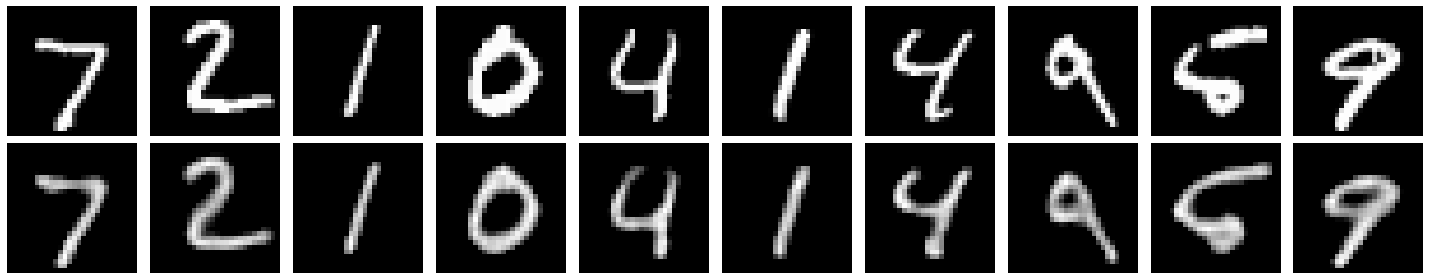

In [0]:
# TESTING
decoded_imgs = autoencoder.predict(X_test)

# VISUALIZATION
plt.figure(figsize=(20, 4))
for i in range(10):
    # original
    plt.subplot(2, 10, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    plt.axis('off')
 
    # reconstruction
    plt.subplot(2, 10, i + 1 + 10)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    plt.axis('off')
 
plt.tight_layout()
plt.show()

# **Denoising Auto-Encoder**

In [0]:
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]
 
X_train_noisy = X_train + 0.25 * np.random.normal(size=X_train.shape)
X_test_noisy = X_test + 0.25 * np.random.normal(size=X_test.shape)

X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

In [0]:
autoencoder.fit(X_train_noisy, X_train, epochs=50, batch_size=256, shuffle=True, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 2s 45us/step - loss: 0.0187 - val_loss: 0.0149
Epoch 2/50
48000/48000 [==============================] - 2s 43us/step - loss: 0.0144 - val_loss: 0.0142
Epoch 3/50
48000/48000 [==============================] - 2s 44us/step - loss: 0.0140 - val_loss: 0.0140
Epoch 4/50
48000/48000 [==============================] - 2s 44us/step - loss: 0.0138 - val_loss: 0.0138
Epoch 5/50
48000/48000 [==============================] - 2s 44us/step - loss: 0.0136 - val_loss: 0.0137
Epoch 6/50
48000/48000 [==============================] - 2s 43us/step - loss: 0.0135 - val_loss: 0.0136
Epoch 7/50
48000/48000 [==============================] - 2s 44us/step - loss: 0.0134 - val_loss: 0.0134
Epoch 8/50
48000/48000 [==============================] - 2s 43us/step - loss: 0.0132 - val_loss: 0.0133
Epoch 9/50
48000/48000 [==============================] - 2s 44us/step - loss: 0.0132 - val_loss: 0.0136
Epoch

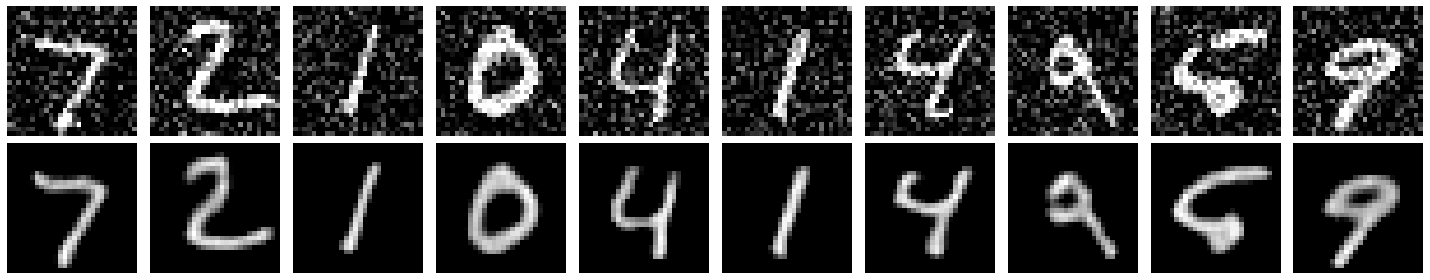

In [0]:
decoded_imgs = autoencoder.predict(X_test_noisy)
 
plt.figure(figsize=(20, 4))
for i in range(10):
    # original
    plt.subplot(2, 10, i + 1)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    plt.axis('off')
 
    # reconstruction
    plt.subplot(2, 10, i + 1 + 10)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    plt.axis('off')
 
plt.tight_layout()
plt.show()

References:
https://pythonmachinelearning.pro/all-about-autoencoders/